# Exploring Data
This Notebook is intended to explore any dataset before building a model on the data. This notebook can be modified to explore any dataset. 

### Set Up

In [19]:
#Common Imports 
import os
import pandas as pd 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Setting Directory

In [2]:
#Change this to the location where you have the data in system 
working_dir="D://Jatin//Projects//datasets"
os.chdir(working_dir)

### Get The Data

In [4]:
df_data = pd.read_csv('insurance.csv',delimiter=',',header='infer')
df_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking For Null Values

In [6]:
df_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

If Null values are found, treat the null values using following methods:
- Imputing with average, mode or median using fillna method
- Dropping the records using dropna method

### Sense-Check
Overall statistics of data to get a sense on data distribution

In [8]:
#For numerical columns
df_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
#For categorical columns
df_data.groupby(['region','sex','smoker']).size()

region     sex     smoker
northeast  female  no        132
                   yes        29
           male    no        125
                   yes        38
northwest  female  no        135
                   yes        29
           male    no        132
                   yes        29
southeast  female  no        139
                   yes        36
           male    no        134
                   yes        55
southwest  female  no        141
                   yes        21
           male    no        126
                   yes        37
dtype: int64

In [18]:
(df_data.groupby(['region','sex','smoker'])
.agg({
'age': ['mean', 'median'], 
'bmi': ['mean','median', 'min', 'max'],
'children': ['mean','median', 'max'],
'charges': ['mean','median', 'min', 'max', 'count']
 }))

age               bmi                           \
                              mean median       mean   median     min     max   
region    sex    smoker                                                         
northeast female no      39.840909   40.5  29.777462  30.1150  16.815  48.070   
                 yes     38.724138   39.0  27.261724  25.2700  17.195  42.750   
          male   no      39.216000   40.0  28.861760  28.3100  15.960  42.655   
                 yes     37.868421   38.0  29.560000  30.3050  17.290  41.895   
northwest female no      39.755556   40.0  29.488704  29.7350  18.050  42.940   
                 yes     38.827586   40.0  28.296897  28.3100  17.765  38.950   
          male   no      38.568182   38.0  28.930379  29.1175  17.385  41.325   
                 yes     39.827586   45.0  29.983966  28.5000  22.895  40.565   
southeast female no      39.071942   39.0  32.780000  32.2300  20.790  46.750   
                 yes     39.250000   42.5  32.251389  31.7350  22.220  47.410   
          male   no      38.261194   38.5  34.129552  33.8250  20.350  53.130   
                 yes     40.054545   41.0  33.650000  35.0900  19.800  52.580   
southwest female no      40.099291   41.0  30.050355  29.6000  17.400  46.700   
                 yes     37.047619   36.0  30.128571  31.3000  18.300  47.600   
          male   no      40.277778   42.0  31.019841  30.5000  19.800  45.900   
                 yes     35.567568   33.0  31.502703  32.7000  19.300  39.900   

                         children                  charges                \
                             mean median max          mean        median   
region    sex    smoker                                                    
northeast female no      0.954545    1.0   4   9640.426984   8681.137100   
                 yes     1.241379    1.0   3  28032.046398  22331.566800   
          male   no      1.144000    1.0   5   8664.042222   8334.457550   
                 yes     0.894737    0.5   3  30926.252583  33993.370025   
northwest female no      1.177778    1.0   5   8786.998679   7731.857850   
                 yes     0.827586    0.0   3  29670.824946  28950.469200   
          male   no      1.060606    1.0   4   8320.689321   6687.438925   
                 yes     1.724138    2.0   4  30713.181419  26109.329050   
southeast female no      1.079137    1.0   5   8440.205552   7046.722200   
                 yes     0.944444    0.0   3  33034.820716  35017.722850   
          male   no      1.052239    1.0   5   7609.003587   6395.947200   
                 yes     1.036364    1.0   3  36029.839367  38282.749500   
southwest female no      1.134752    1.0   5   8234.091260   7348.142000   
                 yes     1.047619    1.0   5  31687.988430  34166.273000   
          male   no      1.119048    1.0   5   7778.905534   7318.960000   
                 yes     1.297297    1.0   4  32598.862854  35585.576000   

                                                         
                                 min          max count  
region    sex    smoker                                  
northeast female no       2196.47320  31620.00106   132  
                 yes     14283.45940  58571.07448    29  
          male   no       1694.79640  32108.66282   125  
                 yes     12829.45510  48549.17835    38  
northwest female no       2117.33885  33471.97189   135  
                 yes     14711.74380  55135.40209    29  
          male   no       1621.34020  30284.64294   132  
                 yes     15817.98570  60021.39897    29  
southeast female no       1607.51010  36580.28216   139  
                 yes     16577.77950  63770.42801    36  
          male   no       1121.87390  27724.28875   134  
                 yes     17043.34140  62592.87309    55  
southwest female no       1727.78500  36910.60803   141  
                 yes     13844.50600  48824.45000    21  
          male   no       1241.56500  27941.28758   126  
  

### Univariate analysis
Plotting distributions to see how frequently each value occurs

In [21]:
# Creating a function which can be resused
def show_distribution(var_data): 
    # Get statistics 
    min_val = var_data.min() 
    max_val = var_data.max() 
    mean_val = var_data.mean() 
    med_val = var_data.median() 
    mod_val = var_data.mode()[0] 
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val, mean_val, med_val, mod_val, 
    max_val)) 

    # Create a figure for 2 subplots (2 rows, 1 column) 
    fig, ax = plt.subplots(2, 1, figsize = (10,4)) 

    # Plot the histogram    
    ax[0].hist(var_data) 
    ax[0].set_ylabel('Frequency') 

    # Add lines for the mean, median, and mode 
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2) 
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2) 
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2) 
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2) 
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2) 

    # Plot the boxplot    
    ax[1].boxplot(var_data, vert=False) 
    ax[1].set_xlabel('Value') 

    # Add a title to the Figure 
    fig.suptitle('Data Distribution') 

    # Show the figure 
    fig.show() 

Minimum:18.00
Mean:39.21
Median:39.00
Mode:18.00
Maximum:64.00



<ipython-input-21-a9308749b989>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


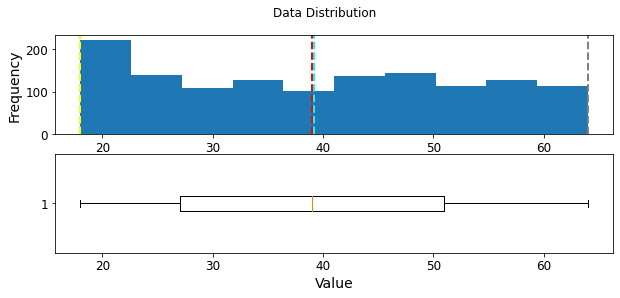

In [22]:
# Get the variable to examine 
col = df_data['age'] 
# Call the function 
show_distribution(col) 

Minimum:15.96
Mean:30.66
Median:30.40
Mode:32.30
Maximum:53.13



<ipython-input-21-a9308749b989>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


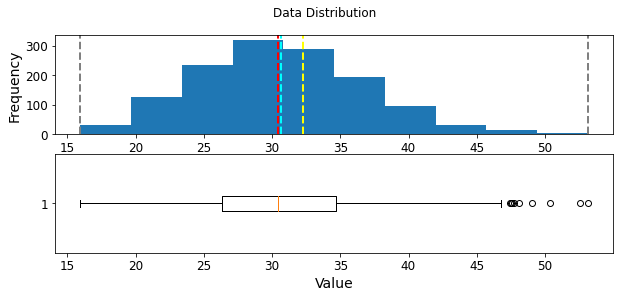

In [23]:
# Get the variable to examine 
col = df_data['bmi'] 
# Call the function 
show_distribution(col) 

Minimum:1121.87
Mean:13270.42
Median:9382.03
Mode:1639.56
Maximum:63770.43



<ipython-input-21-a9308749b989>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


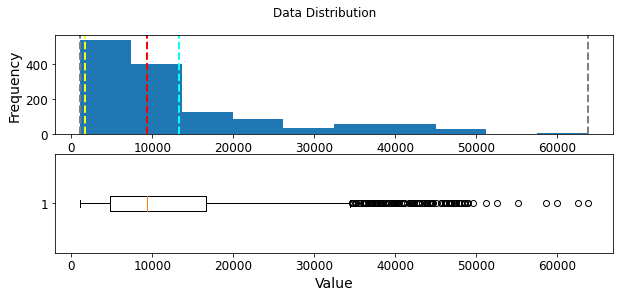

In [25]:
# Get the variable to examine 
col = df_data['charges'] 
# Call the function 
show_distribution(col) 

### Bivariate analysis
Comapring variables to identify apparent relations

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

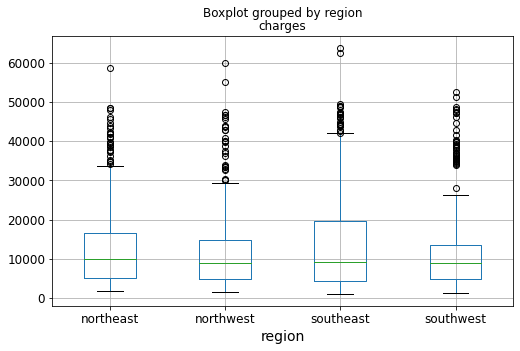

In [26]:
df_data.boxplot(column='charges',by='region',figsize=(8,5))

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

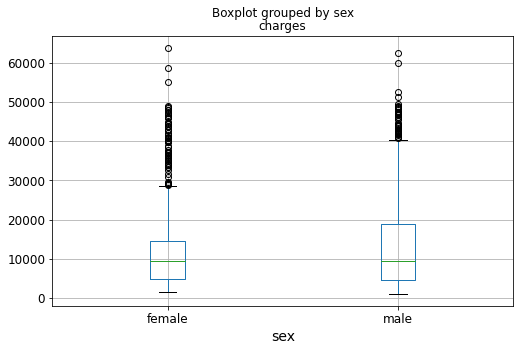

In [27]:
df_data.boxplot(column='charges',by='sex',figsize=(8,5))

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

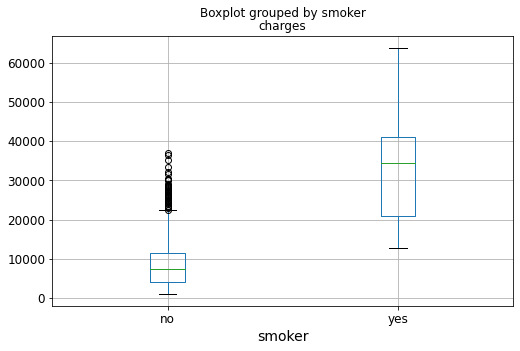

In [28]:
df_data.boxplot(column='charges',by='smoker',figsize=(8,5))

<AxesSubplot:title={'center':'charges'}, xlabel='children'>

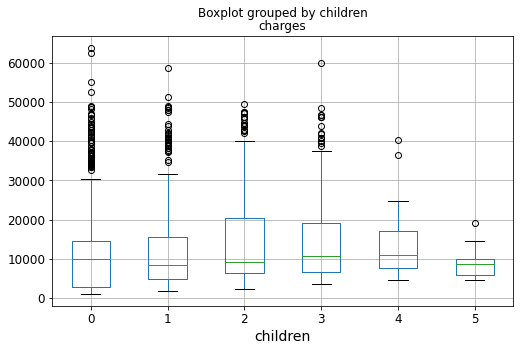

In [29]:
df_data.boxplot(column='charges',by='children',figsize=(8,5))